<a href="https://colab.research.google.com/github/Sriharshitha842/Disease-Prediction/blob/main/DiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **DISEASE PREDICTION MODEL USING RANDOM FOREST CLASSIFIER**



> # Mount google drive to google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



># Import essential packages

In [37]:
import numpy as numpy
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


> # Read the data

In [38]:
dfTrain=pd.read_csv('/content/drive/MyDrive/cp_lab/training_data.csv',error_bad_lines=False)
dfTest=pd.read_csv('/content/drive/MyDrive/cp_lab/test_data.csv',error_bad_lines=False)

> # Data Exploration


In [39]:
dfTrain.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN  
2  Fungal infection           NaN  
3  Fungal infection           NaN  
4  Fungal infection           NaN  

[5 rows x 134 columns]

In [ ]:
dfTest.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze            prognosis  
0                  0     Fungal infection  
1                  0              Allergy  
2                  0                 GERD  
3                  0  Chronic cholestasis  
4                  0        Drug Reaction  

[5 rows x 133 columns]

In [ ]:
dfTrain.tail()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  scurring  skin_peeling  silver_like_dusting  small_dents_in_nails  \
4915  ...         0             0                    0                     0   
4916  ...         1             0                    0                     0   
4917  ...         0             0                    0                     0   
4918  ...         0             1                    1                     1   
4919  ...         0             0                    0                     0   

      inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
4915                   0        0                     0                  0   
4916                   0        0                     0                  0   
4917                   0        0                     0                  0   
4918                   1        0                     0                  0   
4919                   0        1                     1                  1   

                                    prognosis  Unnamed: 133  
4915  (vertigo) Paroymsal  Positional Vertigo           NaN  
4916                                     Acne           NaN  
4917                  Urinary tract infection           NaN  
4918                                Psoriasis           NaN  
4919                                 Impetigo           NaN  

[5 rows x 134 columns]

In [ ]:
dfTest.tail()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
37        0          1                     0                    0          0   
38        0          0                     0                    0          0   
39        0          1                     0                    0          0   
40        0          1                     0                    0          0   
41        1          1                     0                    0          0   

    chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
37       0           0             0        0                 0  ...   
38       0           0             0        0                 0  ...   
39       0           1             0        0                 0  ...   
40       0           0             0        0                 0  ...   
41       0           0             0        0                 0  ...   

    blackheads  scurring  skin_peeling  silver_like_dusting  \
37           1         1             0                    0   
38           0         0             0                    0   
39           0         0             1                    1   
40           0         0             0                    0   
41           0         0             1                    0   

    small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
37                     0                   0        0                     0   
38                     0                   0        0                     0   
39                     1                   1        0                     0   
40                     0                   0        1                     1   
41                     0                   0        0                     1   

    yellow_crust_ooze                prognosis  
37                  0                     Acne  
38                  0  Urinary tract infection  
39                  0                Psoriasis  
40                  1                 Impetigo  
41                  0         Fungal infection  

[5 rows x 133 columns]

In [ ]:
dfTrain.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [ ]:
dfTest.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
dfTrain['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [ ]:
dfTest['prognosis'].value_counts()

Fungal infection                           2
Hepatitis C                                1
Hepatitis E                                1
Alcoholic hepatitis                        1
Tuberculosis                               1
Common Cold                                1
Pneumonia                                  1
Dimorphic hemmorhoids(piles)               1
Heart attack                               1
Varicose veins                             1
Hypothyroidism                             1
Hyperthyroidism                            1
Hypoglycemia                               1
Osteoarthristis                            1
Arthritis                                  1
(vertigo) Paroymsal  Positional Vertigo    1
Acne                                       1
Urinary tract infection                    1
Psoriasis                                  1
Hepatitis D                                1
Hepatitis B                                1
Allergy                                    1
hepatitis 

In [ ]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [ ]:
dfTrain.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...   blackheads     scurring  skin_peeling  \
count       4920.000000  ...  4920.000000  4920.000000   4920.000000   
mean           0.021951  ...     0.021951     0.021951      0.023171   
std            0.146539  ...     0.146539     0.146539      0.150461   
min            0.000000  ...     0.000000     0.000000      0.000000   
25%            0.000000  ...     0.000000     0.000000      0.000000   
50%            0.000000  ...     0.000000     0.000000      0.000000   
75%            0.000000  ...     0.000000     0.000000      0.000000   
max            1.000000  ...     1.000000     1.000000      1.000000   

       silver_like_dusting  small_dents_in_nails  inflammatory_nails  \
count          4920.000000           4920.000000         4920.000000   
mean              0.023171              0.023171            0.023171   
std               0.150461              0.150461            0.150461   
min               0.000000              0.000000            0.000000   
25%               0.000000              0.000000            0.000000   
50%               0.000000              0.000000            0.000000   
75%               0.000000              0.000000            0.000000   
max               1.000000              1.000000            1.000000   

           blister  red_sore_around_nose  yellow_crust_ooze  Unnamed: 133  
count  4920.000000           4920.000000        4920.000000           0.0  
mean      0.023171              0.023171           0.023171           NaN  
std       0.150461              0.150461           0.150461           NaN  
min       0.000000              0.000000           0.000000           NaN  
25%       0.000000              0.000000           0.000000           NaN  
50%       0.000000              0.000000           0.000000           NaN  
75%       0.000000              0.000000           0.000000           NaN  
max       1.000000              1.000000           1.000000           NaN  

[8 rows x 133 columns]

In [ ]:
dfTest.describe()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  42.000000  42.000000             42.000000            42.000000   
mean    0.166667   0.190476              0.023810             0.047619   
std     0.377195   0.397437              0.154303             0.215540   
min     0.000000   0.000000              0.000000             0.000000   
25%     0.000000   0.000000              0.000000             0.000000   
50%     0.000000   0.000000              0.000000             0.000000   
75%     0.000000   0.000000              0.000000             0.000000   
max     1.000000   1.000000              1.000000             1.000000   

       shivering     chills  joint_pain  stomach_pain    acidity  \
count  42.000000  42.000000   42.000000     42.000000  42.000000   
mean    0.023810   0.166667    0.142857      0.047619   0.047619   
std     0.154303   0.377195    0.354169      0.215540   0.215540   
min     0.000000   0.000000    0.000000      0.000000   0.000000   
25%     0.000000   0.000000    0.000000      0.000000   0.000000   
50%     0.000000   0.000000    0.000000      0.000000   0.000000   
75%     0.000000   0.000000    0.000000      0.000000   0.000000   
max     1.000000   1.000000    1.000000      1.000000   1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples  blackheads   scurring  \
count         42.000000  ...           42.000000   42.000000  42.000000   
mean           0.023810  ...            0.023810    0.023810   0.023810   
std            0.154303  ...            0.154303    0.154303   0.154303   
min            0.000000  ...            0.000000    0.000000   0.000000   
25%            0.000000  ...            0.000000    0.000000   0.000000   
50%            0.000000  ...            0.000000    0.000000   0.000000   
75%            0.000000  ...            0.000000    0.000000   0.000000   
max            1.000000  ...            1.000000    1.000000   1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count     42.000000            42.000000             42.000000   
mean       0.047619             0.023810              0.023810   
std        0.215540             0.154303              0.154303   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails    blister  red_sore_around_nose  yellow_crust_ooze  
count           42.000000  42.000000             42.000000          42.000000  
mean             0.023810   0.023810              0.047619           0.023810  
std              0.154303   0.154303              0.215540           0.154303  
min              0.000000   0.000000              0.000000           0.000000  
25%              0.000000   0.000000              0.000000           0.000000  
50%              0.000000   0.000000              0.000000           0.000000  
75%              0.000000   0.000000              0.000000           0.000000  
max              1.000000   1.000000              1.000000           1.000000  

[8 rows x 132 columns]

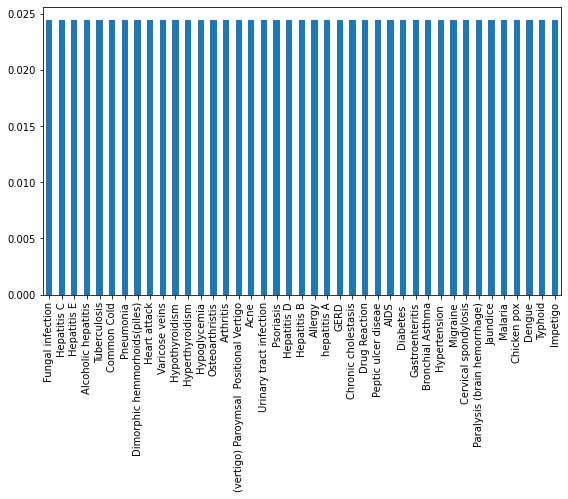

In [ ]:
dfTrain['prognosis'].value_counts(normalize=True).plot.bar()
plt.subplots_adjust(left=0.8,right=2,top=2,bottom=1)

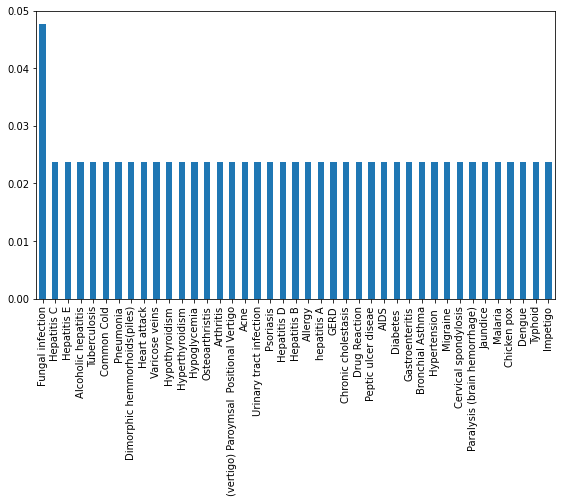

In [ ]:
dfTest['prognosis'].value_counts(normalize=True).plot.bar()
plt.subplots_adjust(left=0.8,right=2,top=2,bottom=1)

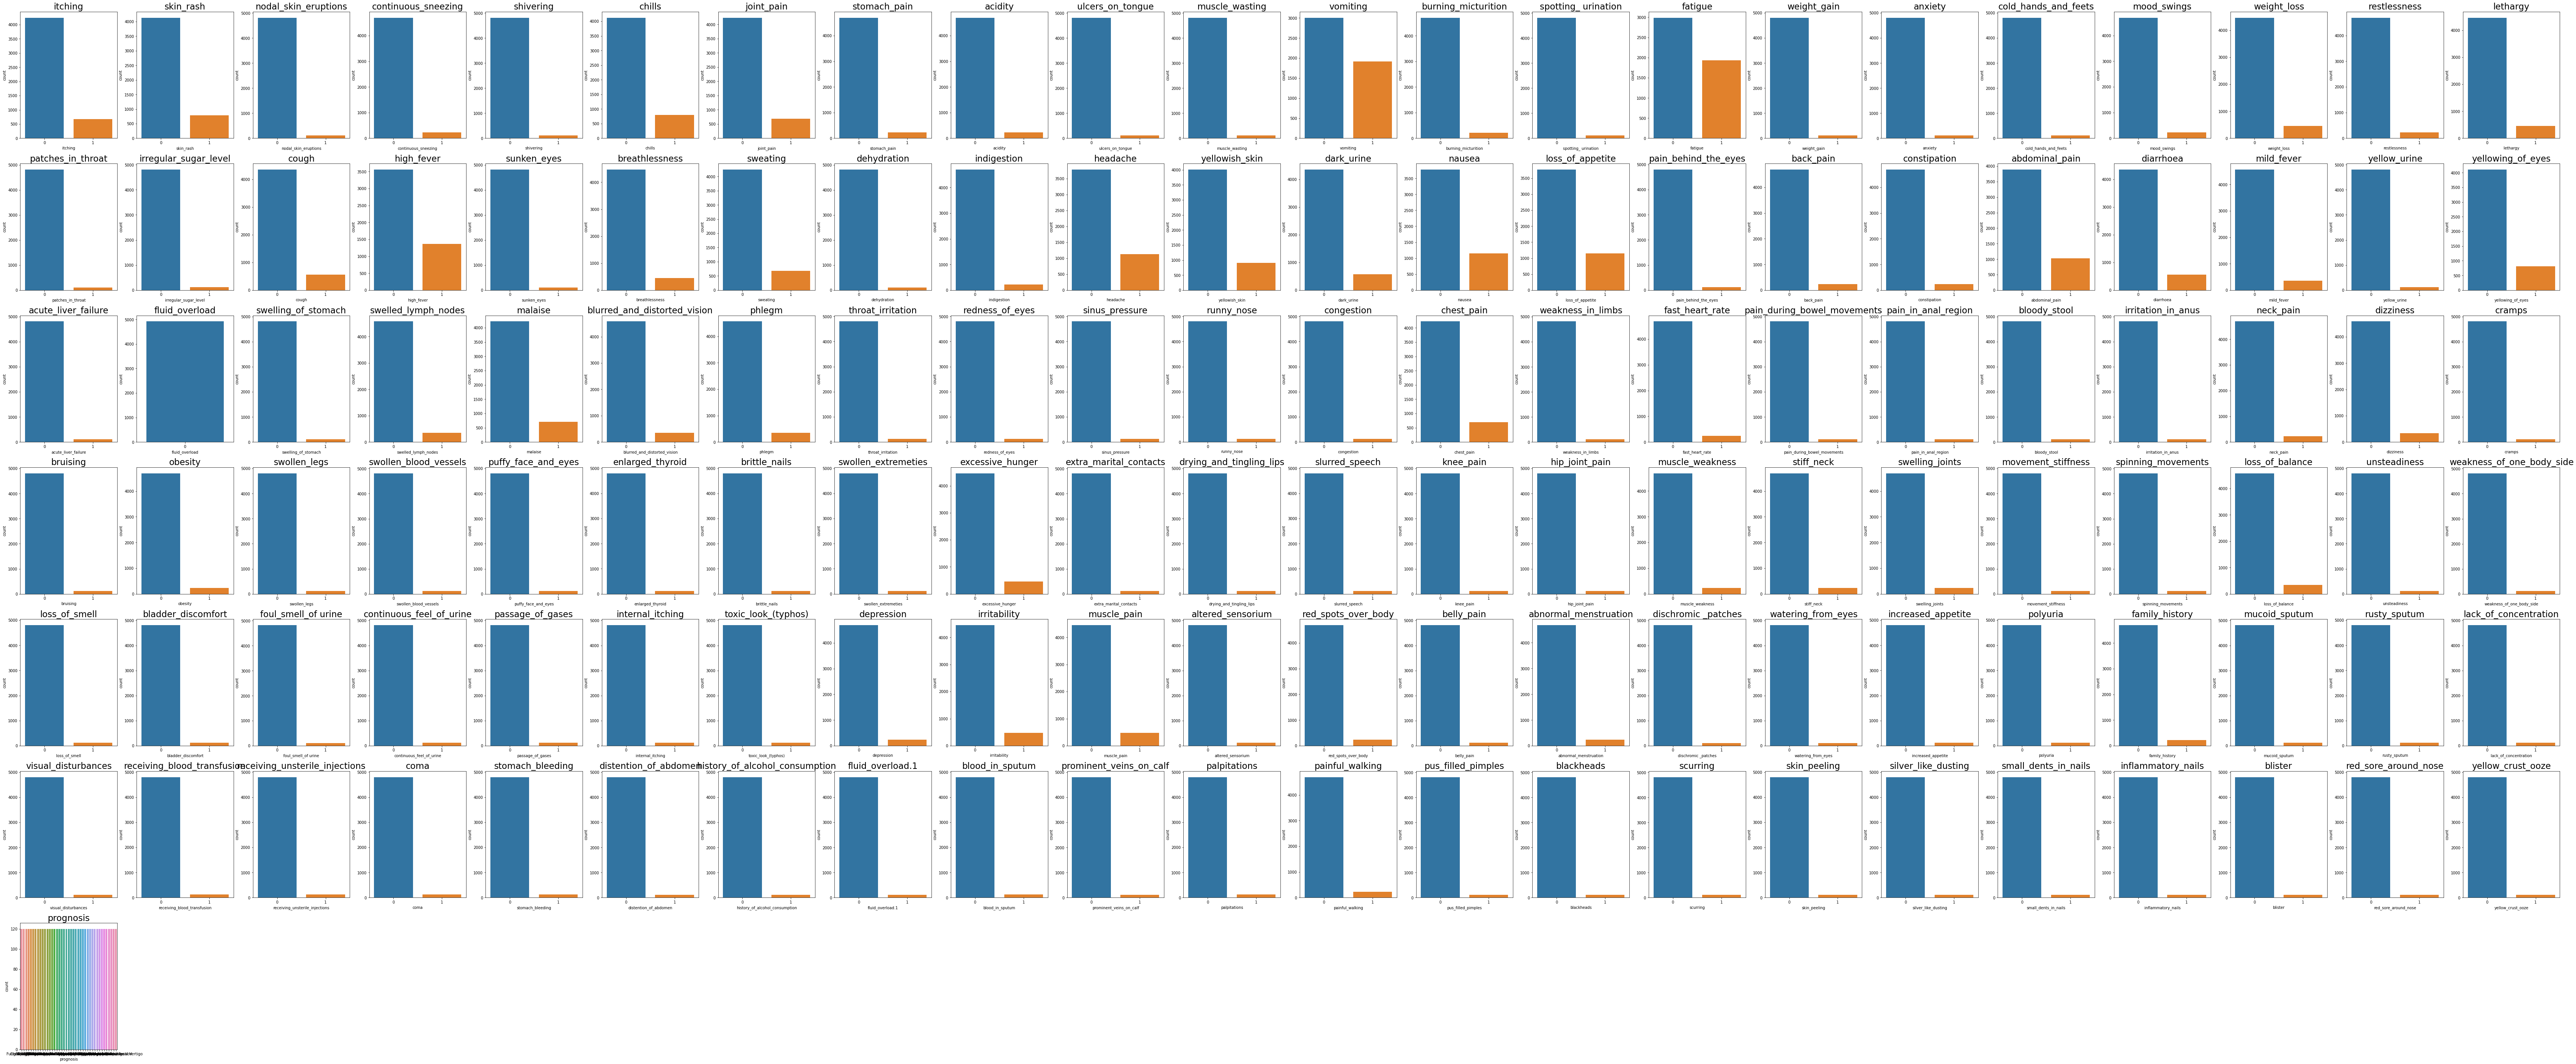

In [ ]:
#Analyzing each symptoms/variable for training dataset
for x in range(dfTrain.shape[1]-1):
    plt.subplot(7,22,x+1)
    plt.subplots_adjust(left = 0.5, right = 16 , top = 10, bottom = 0.5)
    sns.countplot(dfTrain[dfTrain.columns[x]]).set_title(dfTrain.columns[x],fontsize=23)

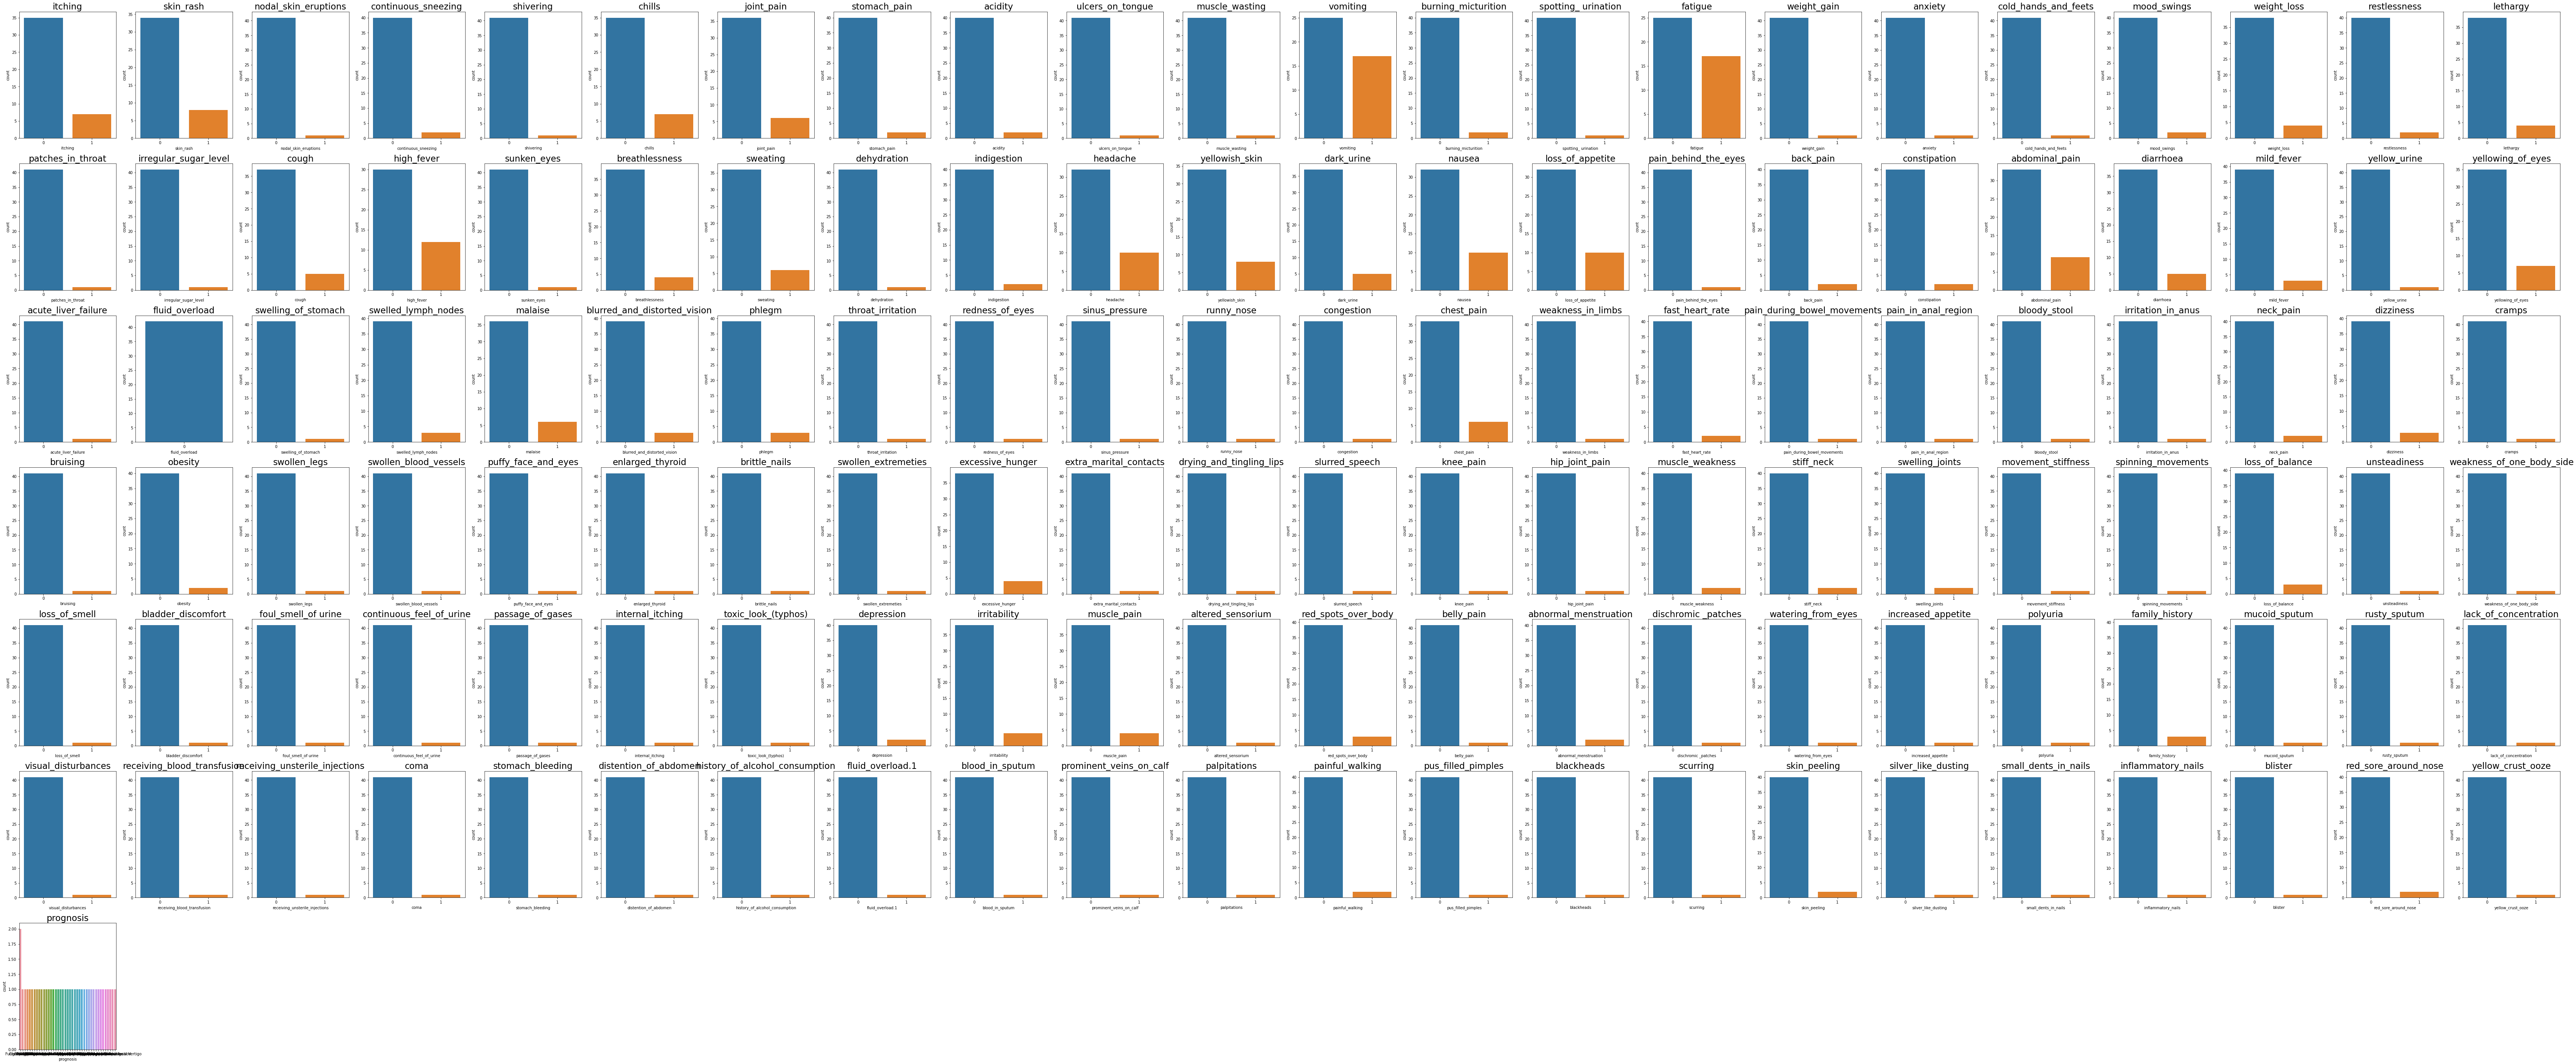

In [ ]:
#Analyzing each symptoms/variable for testing dataset
for x in range(dfTest.shape[1]):
    plt.subplot(7,22,x+1)
    plt.subplots_adjust(left = 0.5, right = 16 , top = 10, bottom = 0.5)
    sns.countplot(dfTest[dfTest.columns[x]]).set_title(dfTest.columns[x],fontsize=23)

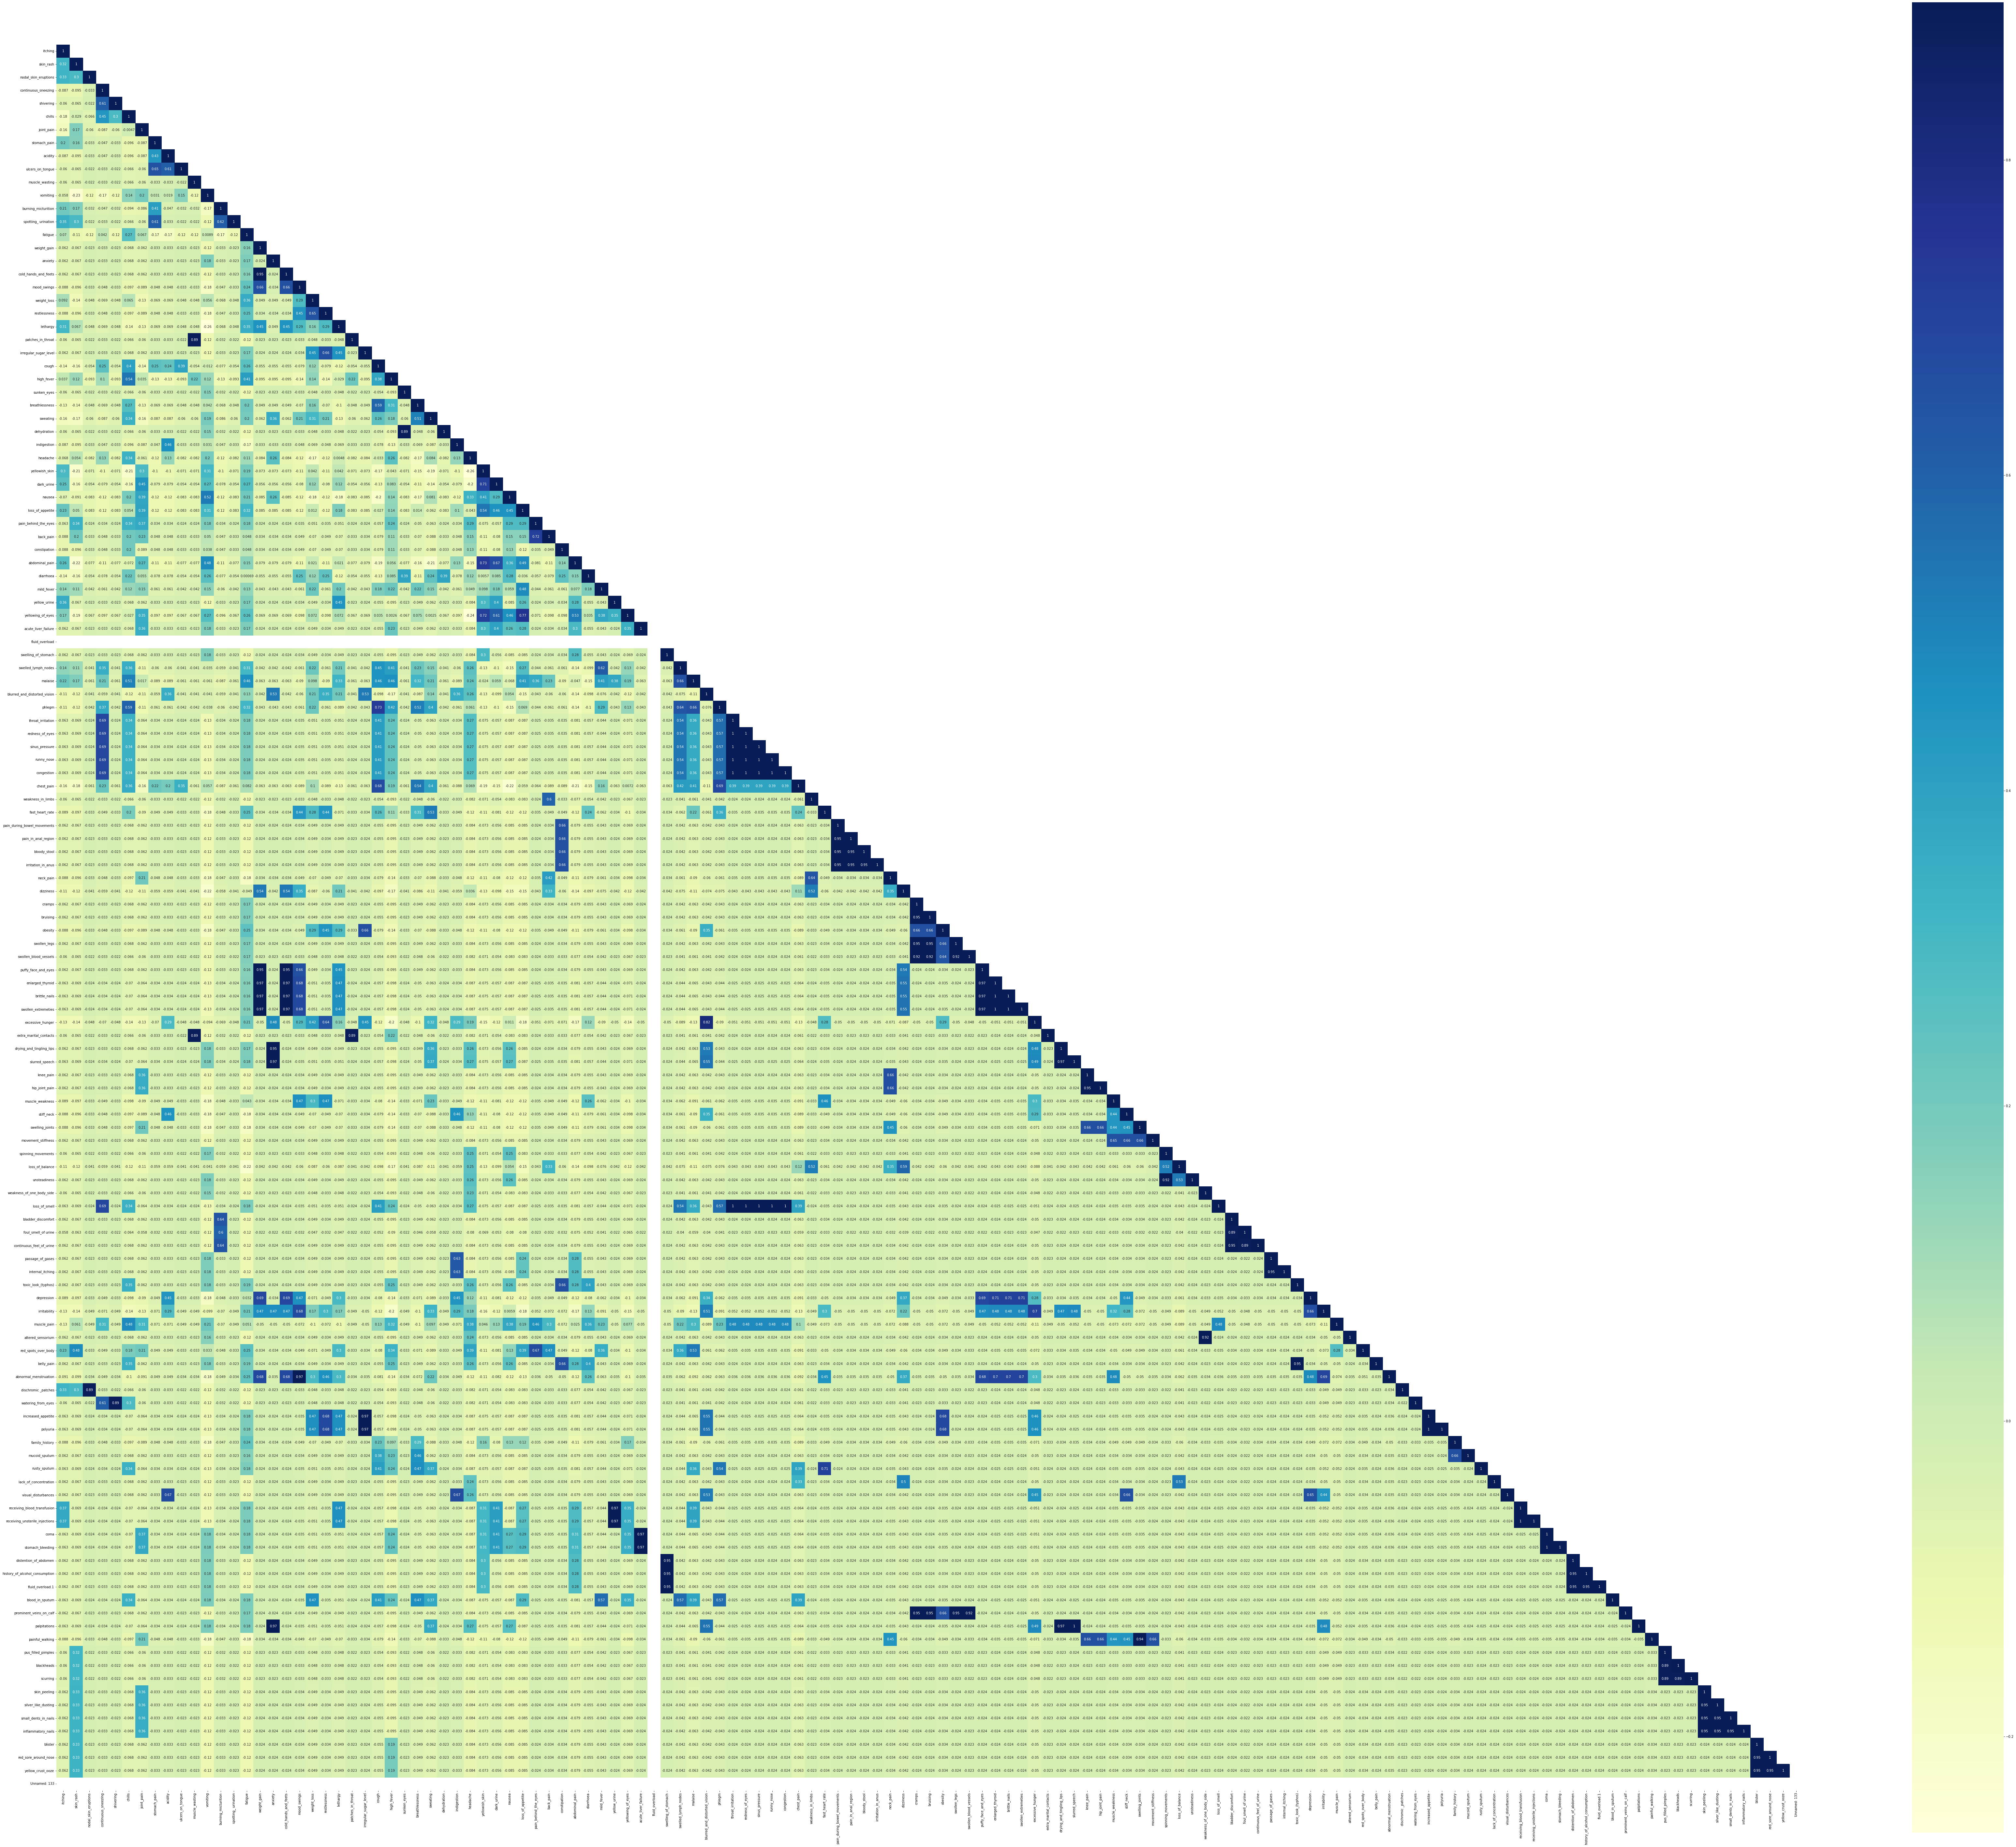

In [ ]:
# check the relationship between variable in dfTrain by applying correlation
corr = dfTrain.corr()
arr = numpy.array(corr)
arr[numpy.tril_indices_from(arr)]=False
plt.subplots_adjust(left=0.5,right=16, top=20, bottom=0.5)
sns.heatmap(corr,mask=arr,vmax=0.9,square=True,annot=True, cmap='YlGnBu')

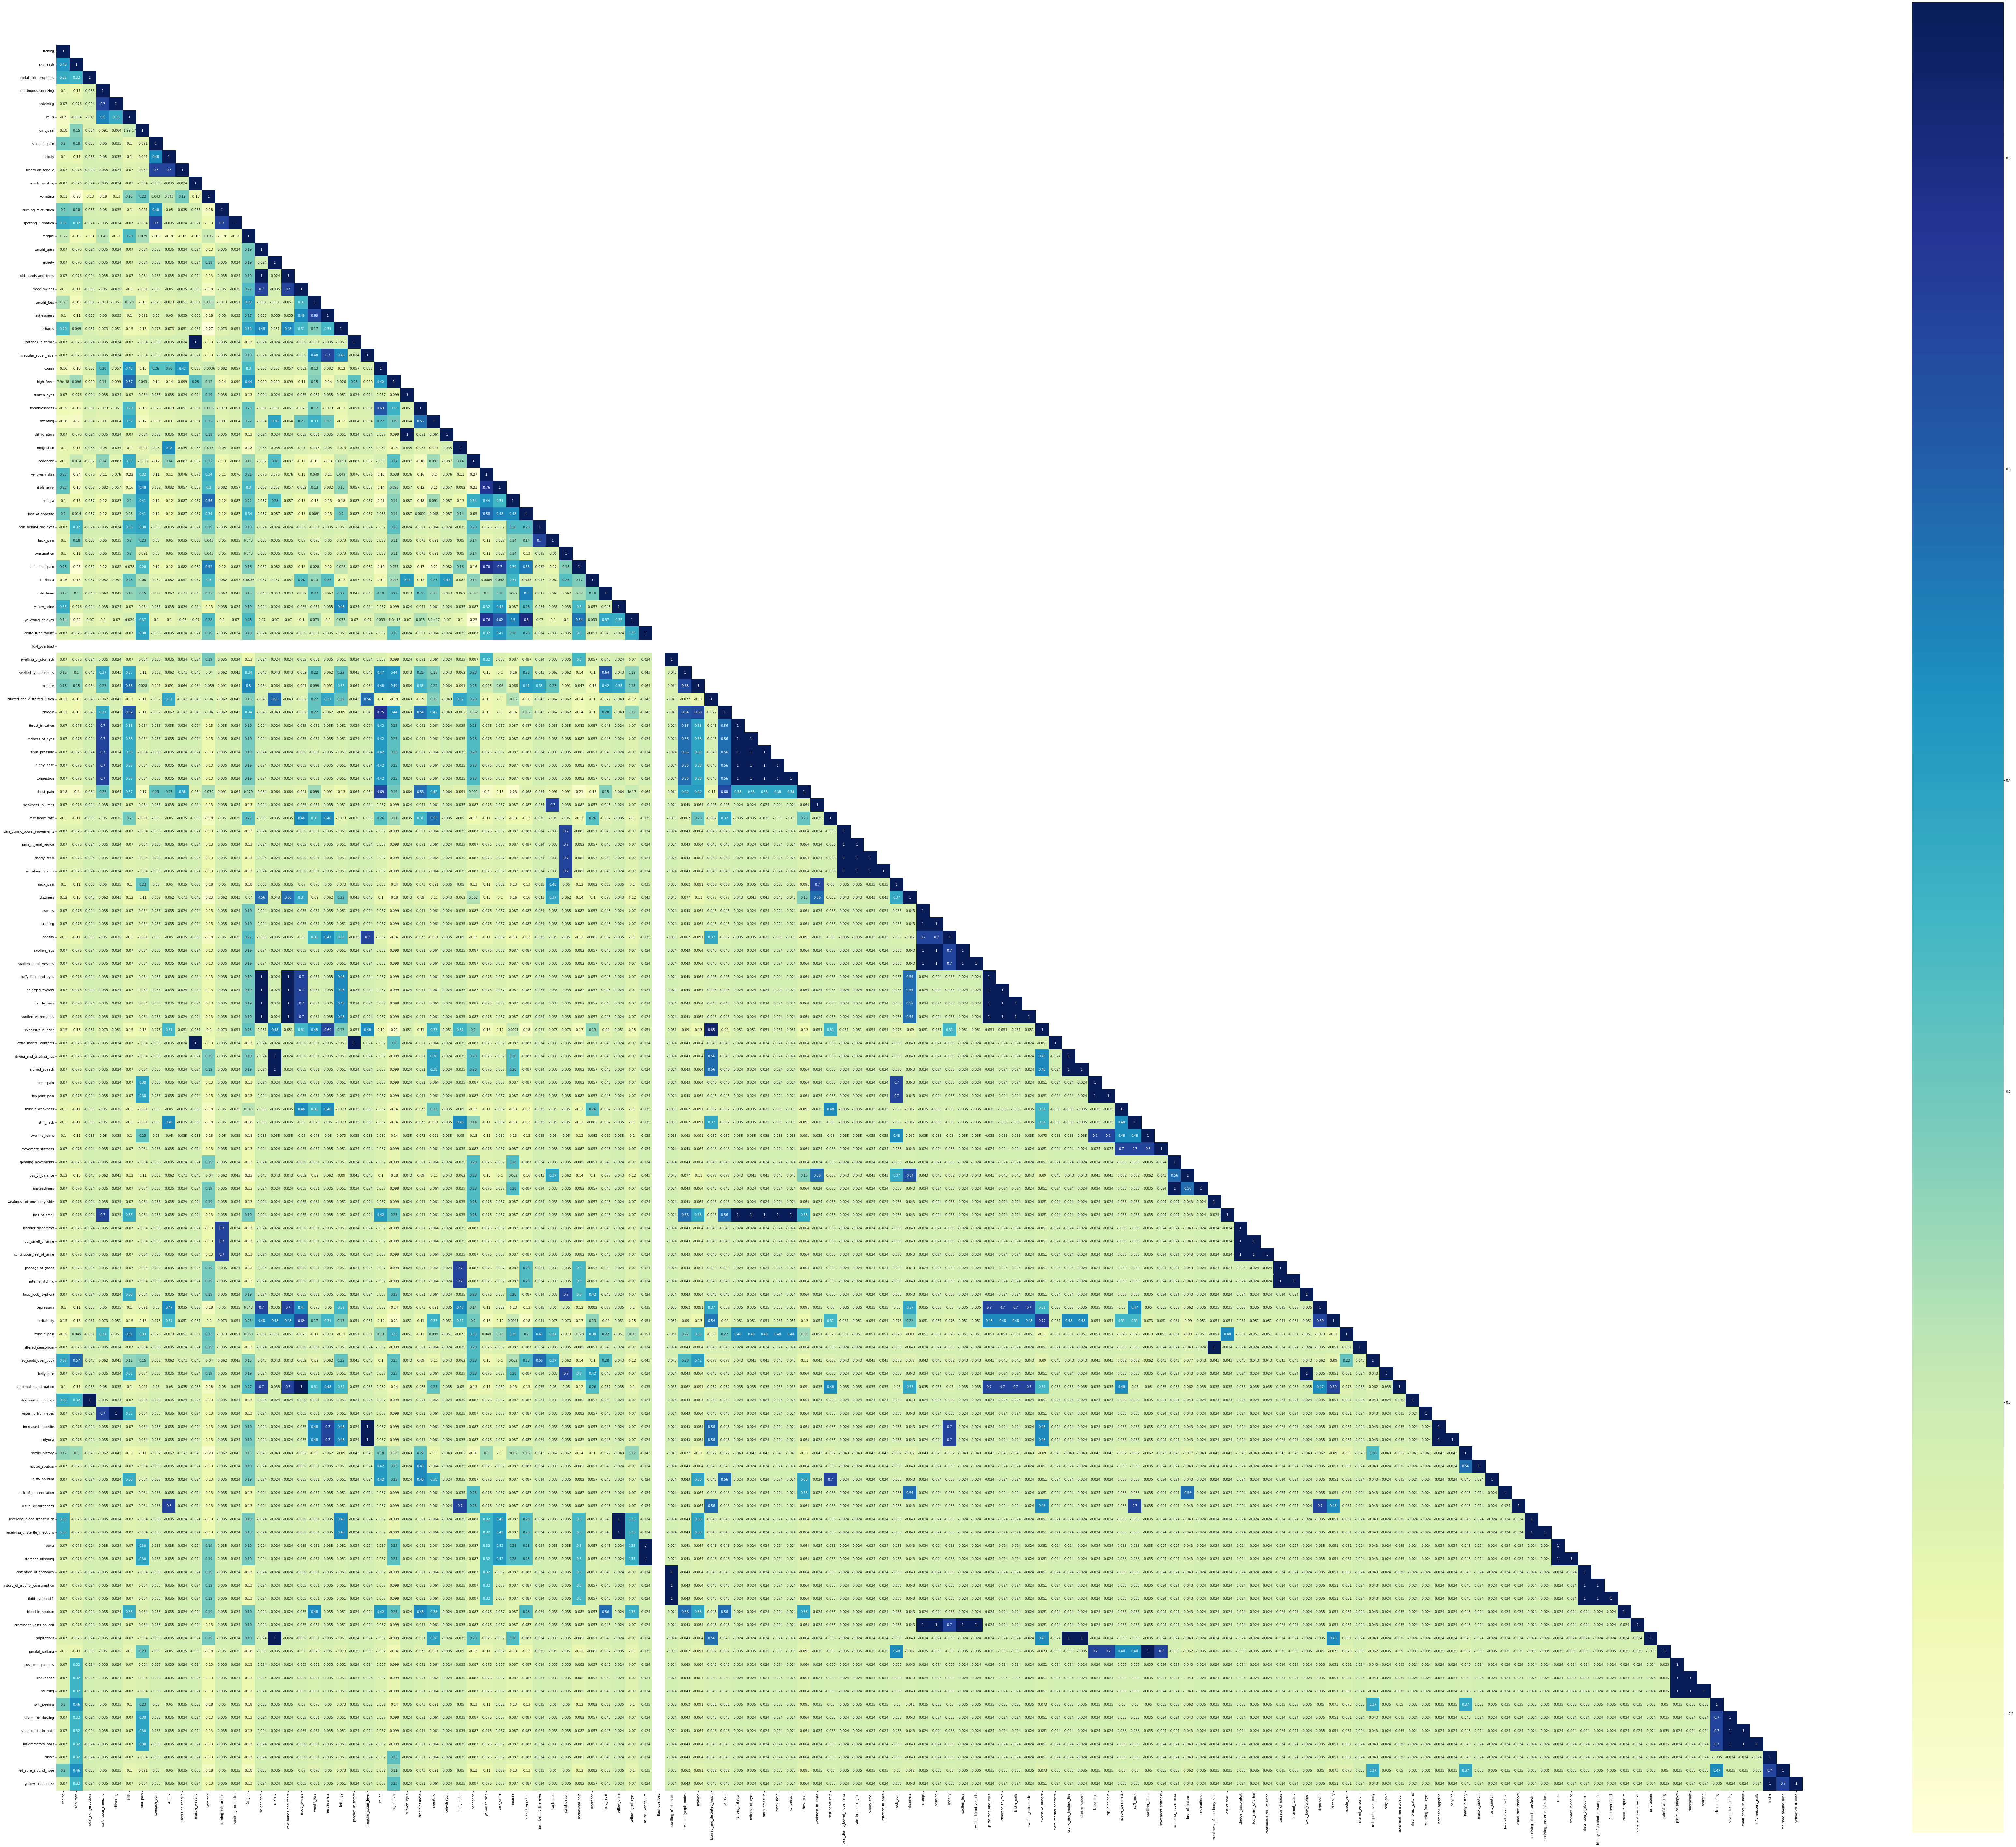

In [ ]:
# check the relationship between variable in dfTest by applying correlation
corr = dfTest.corr()
arr = numpy.array(corr)
arr[numpy.tril_indices_from(arr)]=False
plt.subplots_adjust(left=0.5,right=16, top=20, bottom=0.5)
sns.heatmap(corr,mask=arr,vmax=0.9,square=True,annot=True, cmap='YlGnBu')

In [40]:
train=dfTrain.drop('Unnamed: 133',axis=1)
train.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [41]:
y_train=train.prognosis
x_train=train.drop('prognosis',axis=1)


In [42]:
x_train.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   pus_filled_pimples  blackheads  scurring  skin_peeling  \
0                   0           0         0             0   
1                   0           0         0             0   
2                   0           0         0             0   
3                   0           0         0             0   
4                   0           0         0             0   

   silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                    0                     0                   0        0   
1                    0                     0                   0        0   
2                    0                     0                   0        0   
3                    0                     0                   0        0   
4                    0                     0                   0        0   

   red_sore_around_nose  yellow_crust_ooze  
0                     0                  0  
1                     0                  0  
2                     0                  0  
3                     0                  0  
4                     0                  0  

[5 rows x 132 columns]

In [43]:
y_train.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: prognosis, dtype: object

In [44]:
y_test=dfTest.prognosis
x_test=dfTest.drop('prognosis',axis=1)

In [48]:
x_test.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   pus_filled_pimples  blackheads  scurring  skin_peeling  \
0                   0           0         0             0   
1                   0           0         0             0   
2                   0           0         0             0   
3                   0           0         0             0   
4                   0           0         0             0   

   silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                    0                     0                   0        0   
1                    0                     0                   0        0   
2                    0                     0                   0        0   
3                    0                     0                   0        0   
4                    0                     0                   0        0   

   red_sore_around_nose  yellow_crust_ooze  
0                     0                  0  
1                     0                  0  
2                     0                  0  
3                     0                  0  
4                     0                  0  

[5 rows x 132 columns]

In [49]:
y_test.head()

0       Fungal infection
1                Allergy
2                   GERD
3    Chronic cholestasis
4          Drug Reaction
Name: prognosis, dtype: object

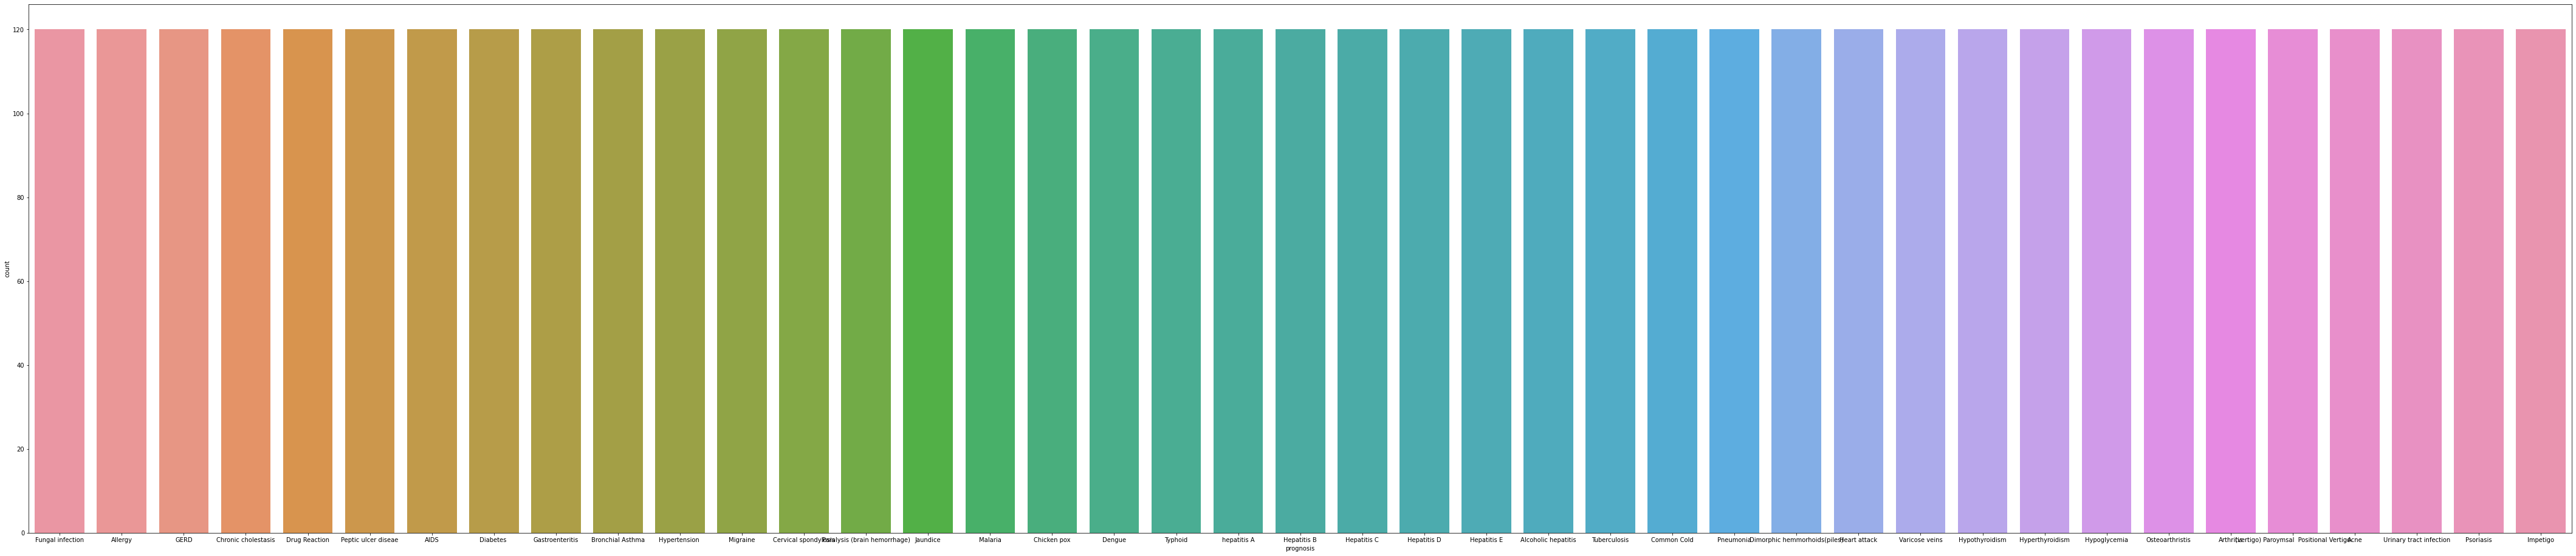

In [50]:
f,ax = plt.subplots(figsize=(75,16))
sns.countplot(y_train,label="Count",ax=ax) 

> # Build a model using Random Forest Classifier

In [51]:
clf = RandomForestClassifier(random_state=43) 
training_start = time.perf_counter()
clf=clf.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = clf.predict(x_test)
prediction_end = time.perf_counter()
ac = accuracy_score(y_test,preds)
print('Accuracy is: ',ac)
clf_train_time = training_end-training_start
clf_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f seconds" % (clf_train_time))
print("Time consumed for prediction: %6.5f seconds" % (clf_prediction_time))

Accuracy is:  0.9761904761904762
Time consumed for training: 0.587 seconds
Time consumed for prediction: 0.01570 seconds


In [52]:
cd /content/drive/MyDrive/cp_lab/flask

/content/drive/MyDrive/cp_lab/flask


> # Dump the model into a pickle file

In [53]:
import pickle
with open('model.pkl','wb') as files:
  pickle.dump(clf, files)

In [54]:
col=x_train.columns
type(col)


pandas.core.indexes.base.Index

In [55]:
len(col)

132

In [56]:
input = "itching stomach_pain skin_rash".split(' ')
input

['itching', 'stomach_pain', 'skin_rash']

In [57]:
b=[0]*len(col)
for x in range(0,132):
    for y in input:
        if(col[x]==y):
            b[x]=1
b=numpy.array(b)
b=b.reshape(1,132)
sol=clf.predict(b)
sol

array(['Drug Reaction'], dtype=object)

> # Install flask-ngrok library

In [58]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


> # Deploy the model using flask-ngrok

In [59]:
!pip install pyngrok==4.1.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15983 sha256=a2362784ea870f17a861e95c112acd80e8fe0b8addbcf74a54001120e8d3103f
  Stored in directory: /root/.cache/pip/wheels/b1/d9/12/045a042fee3127dc40ba6f5df2798aa2df38c414bf533ca765
Successfully built pyngrok


In [60]:
!pip install flask_ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
!ngrok authtoken 2Dk3RbzEVRy4f4XNvVrKkIL927s_6zrSp26mAmoRyYUtUQBaN

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template, url_for, request, jsonify
import pickle


app = Flask(__name__)
run_with_ngrok(app)
model = pickle.load(open("model.pkl", "rb"))

test=pd.read_csv("/content/drive/MyDrive/cp_lab/test_data.csv",error_bad_lines=False)
x_test=test.drop('prognosis',axis=1)

@app.route('/')
def home():
    return render_template('index.html')


@app.route('/predict',methods=['POST','GET'])
def predict():
    if request.method=='POST':
        col=x_test.columns
        inputt = [str(x) for x in request.form.values()]

        b=[0]*132
        for x in range(0,132):
            for y in inputt:
                if(col[x]==y):
                    b[x]=1
        b=numpy.array(b)
        b=b.reshape(1,132)
        prediction = model.predict(b)
        prediction=prediction[0]
    return render_template('index.html', pred="The probable diagnosis says it could be {}".format(prediction))

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://5a62-34-74-118-176.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [24/Aug/2022 08:31:48] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Aug/2022 08:31:49] "GET /static/css/materialize.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Aug/2022 08:31:49] "GET /static/js/materialize.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Aug/2022 08:31:49] "GET /static/js/init.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Aug/2022 08:31:51] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [24/Aug/2022 09:02:13] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Aug/2022 09:02:14] "GET /static/css/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Aug/2022 09:04:10] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Aug/2022 09:31:55] "POST /predict HTTP/1.1" 200 -
ERROR:__main__:Exception on /predict [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  Fil